<a href="https://colab.research.google.com/github/PKKarna/MyQuantProjects/blob/master/TimeSeriesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Results of Dickey-Fuller Test:
Test Statistic                 -1.132038
p-value                         0.702128
#Lags Used                      0.000000
Number of Observations Used    99.000000
Critical Value (1%)            -3.498198
Critical Value (5%)            -2.891208
Critical Value (10%)           -2.582596
dtype: float64

Results of KPSS Test:
Test Statistic           1.100116
p-value                  0.010000
Lags Used                5.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


<ipython-input-1-b149018c7ef0>:27: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression='c', nlags="auto")


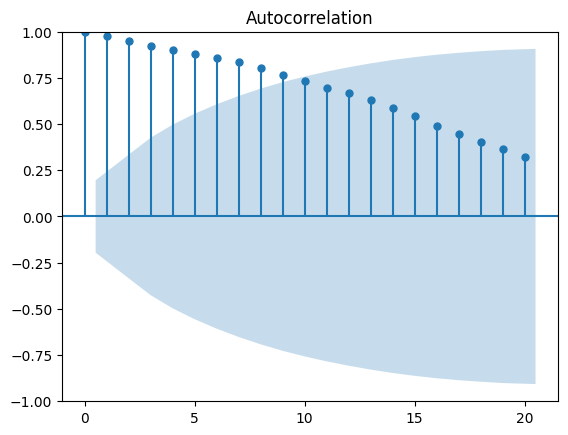

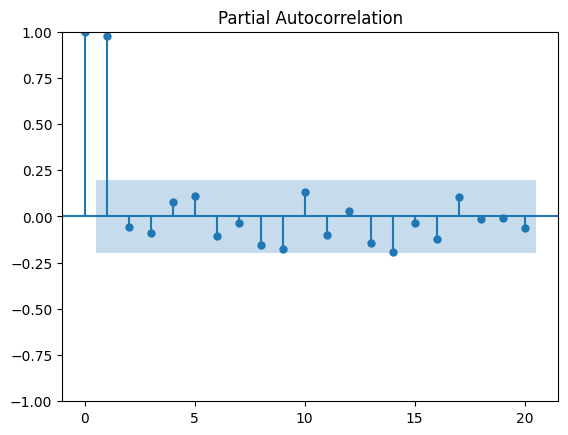

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -142.486
Date:                Thu, 17 Apr 2025   AIC                            290.972
Time:                        11:44:48   BIC                            298.787
Sample:                             0   HQIC                           294.135
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.8033      3.550     15.437      0.000      47.845      61.762
ar.L1          0.9748      0.020     49.482      0.000       0.936       1.013
sigma2         0.9820      0.154      6.393      0.0

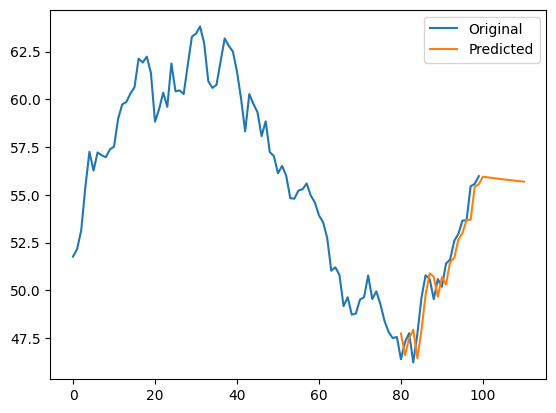

In [1]:
# prompt: End to End simple code for Time Series forecasting model used in finance along with all theoretical assumption tests along with finding random walk hypothesis test  and testing significance of paramters along as per CFA Level 2 Time series related chapters

import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generate sample financial time series data (replace with your actual data)
np.random.seed(0)
n_samples = 100
data = pd.Series(np.cumsum(np.random.randn(n_samples))) + 50

# 1. Stationarity Tests (ADF and KPSS)

def stationarity_tests(timeseries):
  print('Results of Dickey-Fuller Test:')
  dftest = adfuller(timeseries, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)

  print('\nResults of KPSS Test:')
  kpsstest = kpss(timeseries, regression='c', nlags="auto")
  kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
  for key,value in kpsstest[3].items():
    kpss_output['Critical Value (%s)'%key] = value
  print(kpss_output)

stationarity_tests(data)


# 2.  ACF and PACF Plots (for ARIMA order selection)
plot_acf(data)
plt.show()
plot_pacf(data)
plt.show()


# 3. ARIMA Model Fitting (example - adjust order (p,d,q) based on tests above)

# Assuming data is stationary or you've differenced it appropriately
model = ARIMA(data, order=(1, 0, 0)) # Example: AR(1) model. Adjust p,d,q.
results = model.fit()
print(results.summary())

# 4. Random Walk Hypothesis Test

# Calculate the first difference of the time series.
diff_data = data.diff().dropna()

# Perform the Augmented Dickey-Fuller test on the differenced series.
adf_result = adfuller(diff_data)

print('\nRandom Walk Hypothesis Test (ADF test on differenced series):')
print(f'Test Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

# Interpretation:
# If the p-value is less than your significance level (e.g., 0.05),
# reject the null hypothesis that the differenced series is non-stationary,
# suggesting the original series was not a random walk.


# 5. Significance of Parameters (from model summary)

# The p-values for the AR and MA coefficients in the summary table indicate significance.
# A low p-value (usually <0.05) rejects the null hypothesis that the parameter is zero.


# 6. Forecasting
predictions = results.predict(start=len(data)-20, end=len(data)+10)  # Adjust forecast horizon
print(predictions)

# 7. Plotting
plt.plot(data, label='Original')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()

